# Let's Talk About Money

## FIFA 18 Data Exploration With Python

<img src='https://compass-ssl.xbox.com/assets/e3/8a/e38a0652-17a2-4f64-80e0-8d69f0223126.jpg?n=FF18_gallery-desktop_1154x649_03.jpg'>

<b>NOTE:</b> First of all let's import essential libraries:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py

## 1. Importing dataset and preparation of data

### 1.1 Load dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('../00_Datasets/FIFA18/PlayerPersonalData.csv', header = 0)

### 1.2 Let's summarize the Dataset

In [3]:
dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 15 columns):
Unnamed: 0      17981 non-null int64
Unnamed: 0.1    17981 non-null int64
ID              17981 non-null int64
Name            17981 non-null object
Age             17981 non-null int64
Photo           17981 non-null object
Nationality     17981 non-null object
Flag            17981 non-null object
Overall         17981 non-null int64
Potential       17981 non-null int64
Club            17733 non-null object
Club Logo       17981 non-null object
Value           17981 non-null object
Wage            17981 non-null object
Special         17981 non-null int64
dtypes: int64(7), object(8)
memory usage: 2.1+ MB


### 1.3 Data preprocessing

<b>NOTE:</b> Right away we can see that values in columns: 'Value' and 'Wage' aren't numeric but objects. Firstly we need to preprocess the data to make it usable for us. We will use short supporting function to convert values in those two columns into numbers. We will end up with two new columns 'ValueNum' and 'WageNum' that will contain numeric values.

In [5]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    

#dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset['ValueNum'] = dataset['Value'].apply(lambda x: str2number(x))
dataset['WageNum'] = dataset['Wage'].apply(lambda x: str2number(x))

<b>NOTE:</b> We will also add two additional columns: 'ValueCategory' and 'WageCategory'. We will use those collumns to divide players into ten classes.

In [6]:
max_value = float(dataset['ValueNum'].max() + 1)
max_wage = float(dataset['WageNum'].max() + 1)

# Supporting function for creating category columns 'ValueCategory' and 'WageCategory'
def mappingAmount(x, max_amount):
    for i in range(0, 10):
        if x >= max_amount/10*i and x < max_amount/10*(i+1):
            return i
        
dataset['ValueCategory'] = dataset['ValueNum'].apply(lambda x: mappingAmount(x, max_value))
dataset['WageCategory'] = dataset['WageNum'].apply(lambda x: mappingAmount(x, max_wage))

<b>NOTE:</b> Next we add columns: 'OverMeanValue' and 'OverMeanWage'. They will contain two categories 0 and 1 and inform if player value/wage is highier then mean value.

In [7]:
mean_value = float(dataset["ValueNum"].mean())
mean_wage = float(dataset["WageNum"].mean())

# Supporting function for creating category columns 'OverMeanValue' and 'OverMeanWage'
def overValue(x, limit):
    if x > limit:
        return 1
    else:
        return 0
    
dataset['OverMeanValue'] = dataset['ValueNum'].apply(lambda x: overValue(x, mean_value))
dataset['OverMeanWage'] = dataset['WageNum'].apply(lambda x: overValue(x, mean_wage))

In [8]:
dataset.head(10)

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Club Logo,Value,Wage,Special,ValueNum,WageNum,ValueCategory,WageCategory,OverMeanValue,OverMeanWage
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,...,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,95500000.0,565000.0,7,9,1,1
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,...,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,105000000.0,565000.0,8,9,1,1
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,...,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,123000000.0,280000.0,9,4,1,1
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,...,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,97000000.0,510000.0,7,9,1,1
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,...,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,61000000.0,230000.0,4,4,1,1
5,5,5,188545,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,...,https://cdn.sofifa.org/24/18/teams/21.png,€92M,€355K,2143,92000000.0,355000.0,7,6,1,1
6,6,6,193080,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,...,https://cdn.sofifa.org/24/18/teams/11.png,€64.5M,€215K,1458,64500000.0,215000.0,5,3,1,1
7,7,7,183277,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,...,https://cdn.sofifa.org/24/18/teams/5.png,€90.5M,€295K,2096,90500000.0,295000.0,7,5,1,1
8,8,8,182521,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,...,https://cdn.sofifa.org/24/18/teams/243.png,€79M,€340K,2165,79000000.0,340000.0,6,6,1,1
9,9,9,167664,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,...,https://cdn.sofifa.org/24/18/teams/45.png,€77M,€275K,1961,77000000.0,275000.0,6,4,1,1


## 2. Data Visualization Age/Overall/Potential

### 2.1. Grouping players by Age

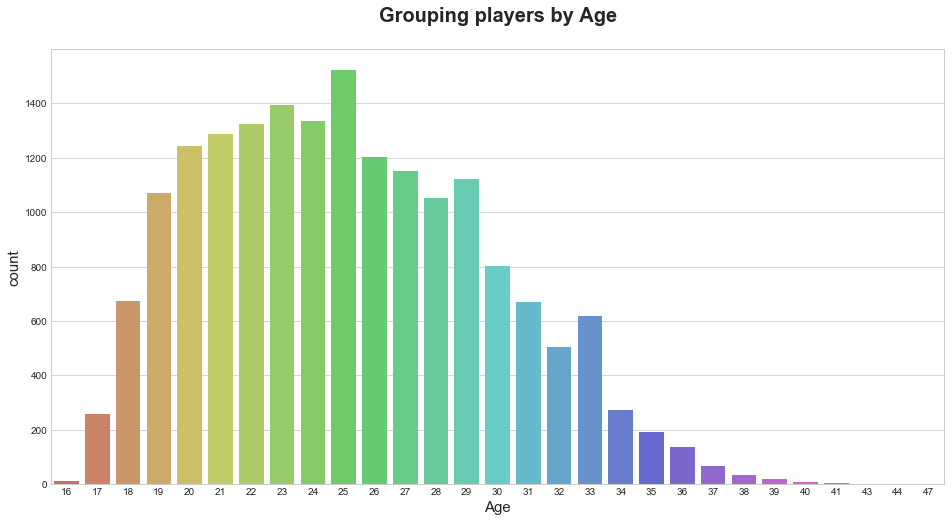

In [9]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Age", data=dataset, palette="hls");
plt.show()

### 2.2. Grouping players by Overall

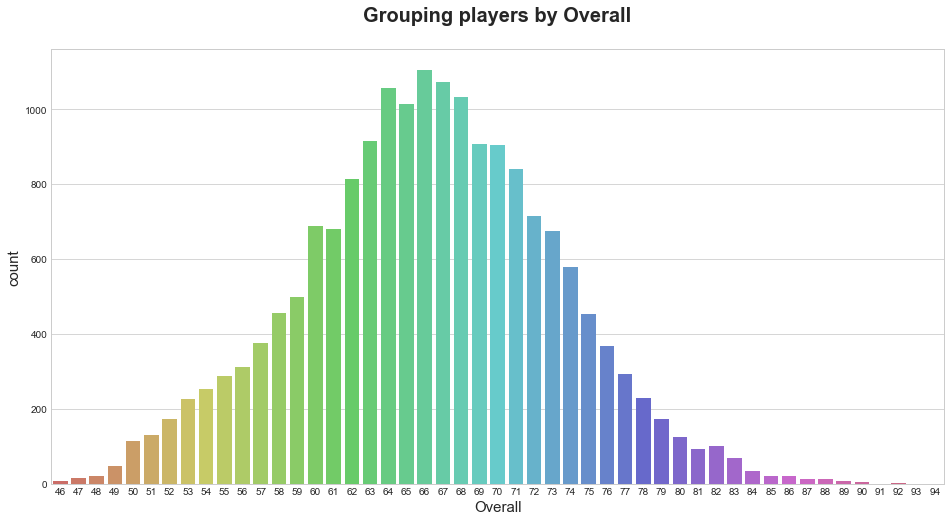

In [10]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Overall", data=dataset, palette="hls");
plt.show()

### 2.3 Age vs Mean Overall Rating

In [11]:
# Selecting players with age smaller then 40 
dataset40 = dataset.loc[dataset['Age'] <= 40]
# Selecting unique Age from DataFrame
age = dataset40.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
overall = dataset40.groupby("Age")["Overall"].mean().values
# Selecting mean Overall from DataFrame
potential = dataset40.groupby("Age")["Potential"].mean().values

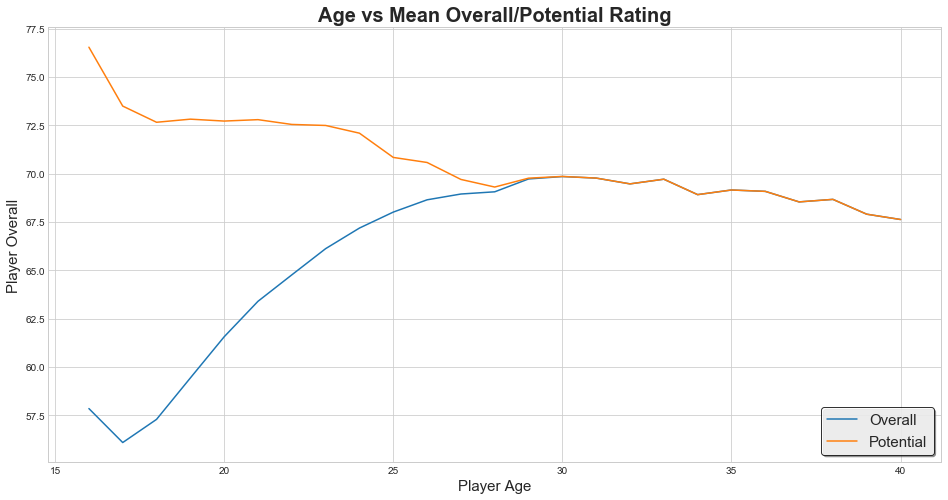

In [12]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Age vs Mean Overall/Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

## 3. Data Value/Wage

### 3.1 Ten players with highest value

In [13]:
sorted_players = dataset.sort_values(["ValueNum"], ascending=False).head(10)
players = sorted_players[["Photo" ,"Name" ,"Age" ,"Nationality" ,"Club", "Value"]].values

In [14]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[0]) + '"style="width:50px;height:50px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Photo,Name,Age,Nationality,Club,Value
,Neymar,25,Brazil,Paris Saint-Germain,€123M
,L. Messi,30,Argentina,FC Barcelona,€105M
,L. Suárez,30,Uruguay,FC Barcelona,€97M
,Cristiano Ronaldo,32,Portugal,Real Madrid CF,€95.5M
,R. Lewandowski,28,Poland,FC Bayern Munich,€92M
,E. Hazard,26,Belgium,Chelsea,€90.5M
,K. De Bruyne,26,Belgium,Manchester City,€83M
,T. Kroos,27,Germany,Real Madrid CF,€79M
,P. Dybala,23,Argentina,Juventus,€79M
,G. Higuaín,29,Argentina,Juventus,€77M


### 3.2 Ten players with highest wage

In [15]:
sorted_players = dataset.sort_values(["WageNum"], ascending=False).head(10)
players = sorted_players[["Photo" ,"Name" ,"Age" ,"Nationality" ,"Club", "Wage"]].values

In [16]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[0]) + '"style="width:50px;height:50px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

Photo,Name,Age,Nationality,Club,Wage
,Cristiano Ronaldo,32,Portugal,Real Madrid CF,€565K
,L. Messi,30,Argentina,FC Barcelona,€565K
,L. Suárez,30,Uruguay,FC Barcelona,€510K
,G. Bale,27,Wales,Real Madrid CF,€370K
,R. Lewandowski,28,Poland,FC Bayern Munich,€355K
,L. Modrić,31,Croatia,Real Madrid CF,€340K
,T. Kroos,27,Germany,Real Madrid CF,€340K
,S. Agüero,29,Argentina,Manchester City,€325K
,Sergio Ramos,31,Spain,Real Madrid CF,€310K
,E. Hazard,26,Belgium,Chelsea,€295K


### 3.3 Over or Under Mean Value

In [17]:
print('Mean value of player in FIFA 18 is around: €' + str(round(mean_value, -5)) + '.')

Mean value of player in FIFA 18 is around: €2400000.0.


In [38]:
players_value = dataset.groupby("OverMeanValue").size().reset_index(name='NumberOfPlayers')

In [71]:
# Number of players with value smaller then mean
players_value

,OverMeanValue,NumberOfPlayers
0,0,13805
1,1,4176


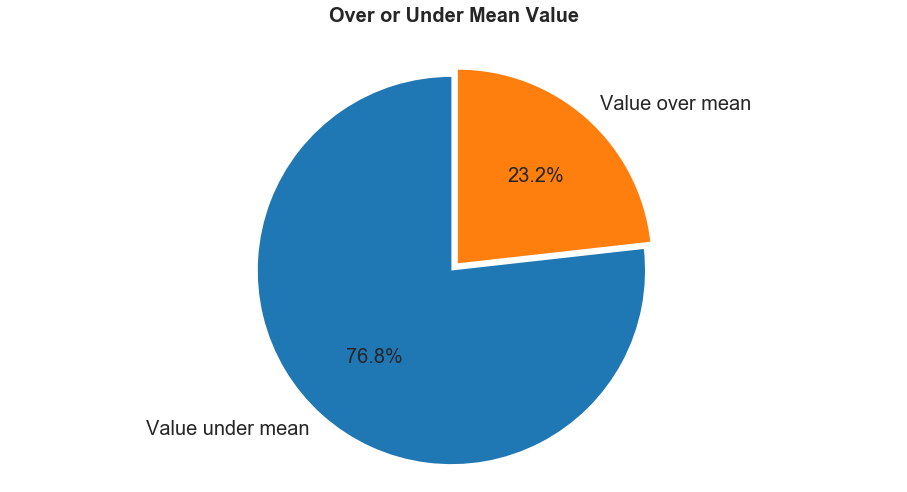

In [79]:
plt.figure(figsize=(16,8))
plt.title('Over or Under Mean Value', fontsize=20, fontweight='bold', y=1.05,)
labels = 'Value under mean', 'Value over mean'
explode=(0, 0.05)
plt.pie(players_value["NumberOfPlayers"], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.rcParams['font.size'] = 20.0
plt.show()

### 3.4 Players Value vs Age & Overall

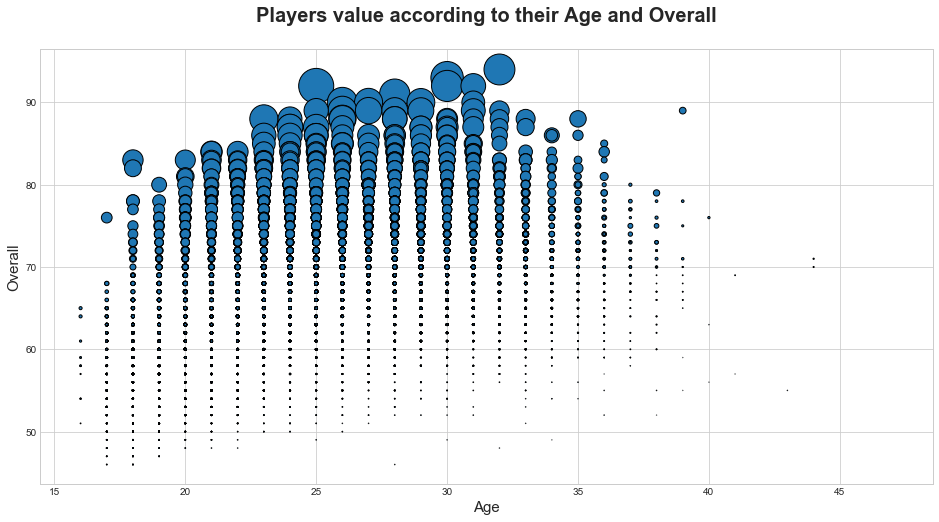

In [19]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players value according to their Age and Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Overall', fontsize=15)

age = dataset["Age"].values
overall = dataset["Overall"].values
value = dataset["ValueNum"].values

plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()

### 3.5 Players Wage vs Age & Overall

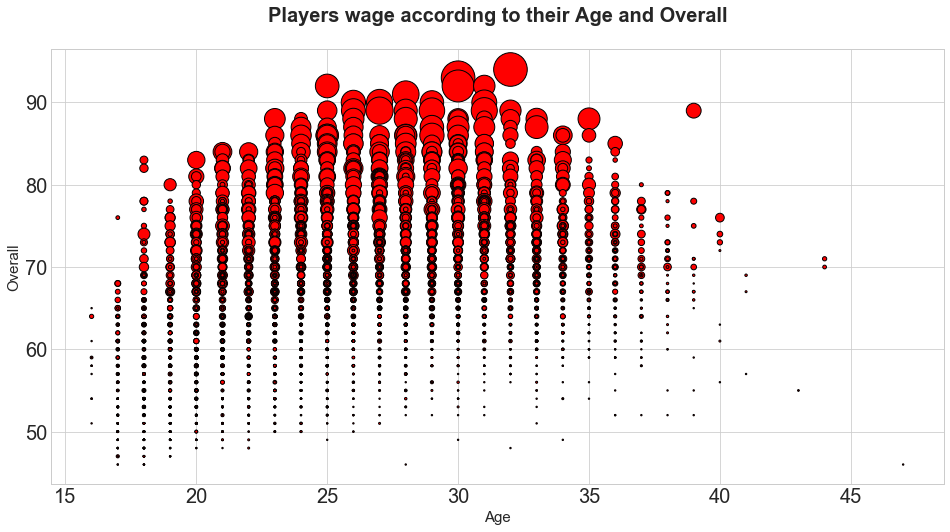

In [84]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players wage according to their Age and Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Overall', fontsize=15)

age = dataset["Age"].values
overall = dataset["Overall"].values
value = dataset["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

In [127]:
total_value = dataset.groupby("Club").sum().sort_values("ValueNum", ascending=False).head(20).reset_index()[["Club", "ValueNum"]]

In [128]:
total_value

,Club,ValueNum
0,Real Madrid CF,826700000.0
1,FC Bayern Munich,748825000.0
2,FC Barcelona,744500000.0
3,Chelsea,673085000.0
4,Paris Saint-Germain,631750000.0
5,Manchester United,625300000.0
6,Juventus,617100000.0
7,Manchester City,578215000.0
8,Atlético Madrid,566150000.0
9,Tottenham Hotspur,516955000.0


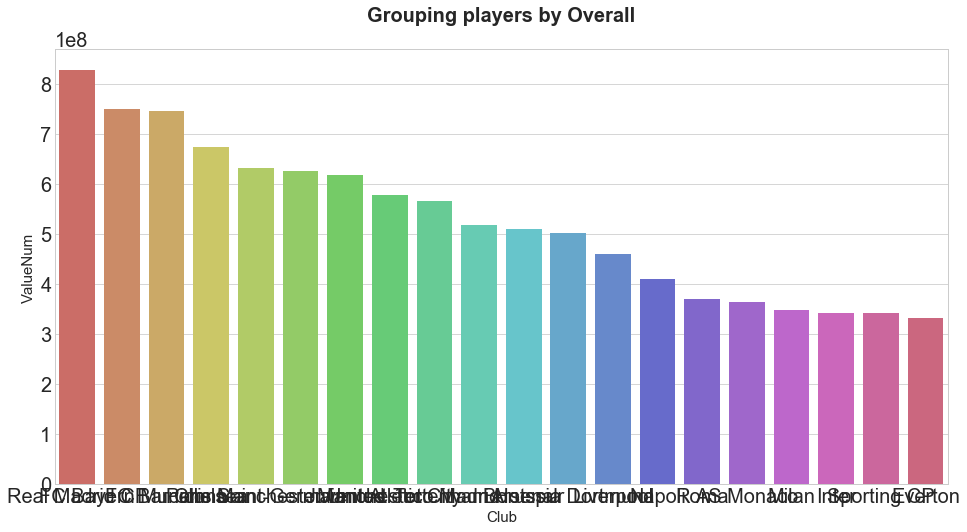

In [126]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.barplot(x="Club", y="ValueNum", data=total_value, palette="hls");
plt.show()